# 831 Project - Product Clustering

In [123]:
import datetime
print(datetime.datetime.now())

2020-08-07 01:33:55.537540


In [124]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import pandas_profiling

import itertools

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer

from kmodes.kmodes import KModes

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# This will ensure that matplotlib figures don't get cut off when saving with savefig()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Read in Data

In [125]:
df = pd.read_csv(r"/Users/rakeshdhara/Documents/Master of Management Analytics/22 831 Marketing Analytics/Group Project/831_final_product_level_dataset.csv")

list(df)
df.shape
df.info()
df.describe().transpose()
df.head(n=20)
df.tail()

['product_id',
 'percentage_weekday_products',
 'percentage_daytime_products',
 'product_category_name_english',
 'product_super_category_name',
 'units_sold',
 'revenue',
 'avg_price',
 'avg_delivery_time_days',
 'sellers',
 'units_sold_per_seller',
 'avg_review_score',
 'photo_effect']

(32951, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   percentage_weekday_products    32951 non-null  float64
 2   percentage_daytime_products    32951 non-null  float64
 3   product_category_name_english  32328 non-null  object 
 4   product_super_category_name    32328 non-null  object 
 5   units_sold                     32951 non-null  int64  
 6   revenue                        32951 non-null  float64
 7   avg_price                      32951 non-null  float64
 8   avg_delivery_time_days         32951 non-null  float64
 9   sellers                        32951 non-null  int64  
 10  units_sold_per_seller          32951 non-null  float64
 11  avg_review_score               32951 non-null  float64
 12  photo_effect                   32951 non-null 

count        mean          std   min      25%  \
percentage_weekday_products  32951.0   76.764046    36.237581  0.00  66.6667   
percentage_daytime_products  32951.0   60.756537    41.832243  0.00   0.0000   
units_sold                   32951.0    3.418713    10.619709  1.00   1.0000   
revenue                      32951.0  412.480462  1371.945598  2.20  59.9000   
avg_price                    32951.0  145.302464   246.895756  0.85  39.9000   
avg_delivery_time_days       32951.0   12.301998     8.486397  0.00   7.2500   
sellers                      32951.0    1.045431     0.260092  1.00   1.0000   
units_sold_per_seller        32951.0    3.166522     9.535379  1.00   1.0000   
avg_review_score             32951.0    4.031348     1.225486  1.00   3.5000   
photo_effect                 32951.0    1.003187     5.660010  0.00   0.0000   

                                  50%    75%      max  
percentage_weekday_products  100.0000  100.0    100.0  
percentage_daytime_products   71.4286  100.0    100.0  
units_sold                     1.0000    3.0    527.0  
revenue                      136.7500  329.0  63885.0  
avg_price                     79.0000  154.9   6735.0  
avg_delivery_time_days        11.0000   15.0    196.0  
sellers                        1.0000    1.0      8.0  
units_sold_per_seller          1.0000    3.0    527.0  
avg_review_score               4.5000    5.0      5.0  
photo_effect                   0.0000    1.0    527.0

product_id  percentage_weekday_products  \
0   00066f42aeeb9f3007548bb9d3f33c38                       0.0000   
1   00088930e925c41fd95ebfe695fd2655                     100.0000   
2   0009406fd7479715e4bef61dd91f2462                     100.0000   
3   000b8f95fcb9e0096488278317764d19                     100.0000   
4   000d9be29b5207b54e86aa1b1ac54872                     100.0000   
5   0011c512eb256aa0dbbb544d8dffcf6e                     100.0000   
6   00126f27c813603687e6ce486d909d01                       0.0000   
7   001795ec6f1b187d37335e1c4704762e                      66.6667   
8   001b237c0e9bb435f2e54071129237e9                     100.0000   
9   001b72dfd63e9833e8c02742adf472e3                      64.2857   
10  001c5d71ac6ad696d22315953758fa04                     100.0000   
11  00210e41887c2a8ef9f791ebc780cc36                      71.4286   
12  002159fe700ed3521f46cfcf6e941c76                      62.5000   
13  0021a87d4997a48b6cef1665602be0f5                     100.0000   
14  00250175f79f584c14ab5cecd80553cd                      45.4545   
15  002552c0663708129c0019cc97552d7d                     100.0000   
16  002959d7a0b0990fe2d69988affcbc80                       0.0000   
17  002af88741ba70c7b5cf4e4a0ad7ef85                     100.0000   
18  002c6dab60557c48cfd6c2222ef7fd76                     100.0000   
19  002d4ea7c04739c130bb74d7e7cd1694                     100.0000   

    percentage_daytime_products product_category_name_english  \
0                        0.0000                     perfumery   
1                        0.0000                          auto   
2                      100.0000                bed_bath_table   
3                       50.0000                    housewares   
4                      100.0000                 watches_gifts   
5                        0.0000                          auto   
6                        0.0000                    cool_stuff   
7                       22.2222                consoles_games   
8                        0.0000                bed_bath_table   
9                       50.0000               furniture_decor   
10                       0.0000                bed_bath_table   
11                     100.0000                 health_beauty   
12                      87.5000                 fashion_shoes   
13                     100.0000         computers_accessories   
14                      72.7273                    housewares   
15                       0.0000                    cool_stuff   
16                     100.0000               furniture_decor   
17                     100.0000                    cool_stuff   
18                     100.0000                          toys   
19                     100.0000                      pet_shop   

   product_super_category_name  units_sold  revenue   avg_price  \
0                      fashion           1   101.65  101.650000   
1              tools_or_repair           1   129.90  129.900000   
2                    household           1   229.00  229.000000   
3                    household           2   117.80   58.900000   
4                   technology           1   199.00  199.000000   
5              tools_or_repair           1    52.00   52.000000   
6                entertainment           2   498.00  249.000000   
7                   technology           9   350.10   38.900000   
8                    household           1    78.90   78.900000   
9                    household          14   489.86   34.990000   
10                   household           1    79.90   79.900000   
11                     fashion           7   233.89   33.412857   
12                     fashion           8  1618.60  202.325000   
13                  technology           1    29.00   29.000000   
14                   household          11   829.89   75.444545   
15               entertainment           1   108.00  108.000000   
16                   household           1   129.90  129.900000   
17  

product_id  percentage_weekday_products  \
32946  fff6177642830a9a94a0f2cba5e476d1                          0.0   
32947  fff81cc3158d2725c0655ab9ba0f712c                        100.0   
32948  fff9553ac224cec9d15d49f5a263411f                        100.0   
32949  fffdb2d0ec8d6a61f0a0a0db3f25b441                         80.0   
32950  fffe9eeff12fcbd74a2f2b007dde0c58                        100.0   

       percentage_daytime_products product_category_name_english  \
32946                        100.0                    cool_stuff   
32947                        100.0                 health_beauty   
32948                        100.0      fashion_bags_accessories   
32949                        100.0         computers_accessories   
32950                        100.0                          toys   

      product_super_category_name  units_sold  revenue  avg_price  \
32946               entertainment           2   229.98     114.99   
32947                     fashion           1    90.00      90.00   
32948                     fashion           1    32.00      32.00   
32949                  technology           5   169.95      33.99   
32950                   household           1   249.99     249.99   

       avg_delivery_time_days  sellers  units_sold_per_seller  \
32946                     9.5        1                    2.0   
32947                     3.0        1                    1.0   
32948                    11.0        1                    1.0   
32949                     7.6        1                    5.0   
32950                    23.0        1                    1.0   

       avg_review_score  photo_effect  
32946               4.5             0  
32947               4.0             0  
32948               5.0             1  
32949               5.0             5  
32950               4.0             1

## Profile the Data

In [7]:
#pandas_profiling.ProfileReport(df, check_correlation=False) - this code given by Prof did not work
#I used the below code and it worked
pandas_profiling.ProfileReport(df) 

In [126]:
#CREATE DUMMIES in the product df

df = pd.get_dummies(df, columns=['product_super_category_name'])
df.head()

product_id  percentage_weekday_products  \
0  00066f42aeeb9f3007548bb9d3f33c38                          0.0   
1  00088930e925c41fd95ebfe695fd2655                        100.0   
2  0009406fd7479715e4bef61dd91f2462                        100.0   
3  000b8f95fcb9e0096488278317764d19                        100.0   
4  000d9be29b5207b54e86aa1b1ac54872                        100.0   

   percentage_daytime_products product_category_name_english  units_sold  \
0                          0.0                     perfumery           1   
1                          0.0                          auto           1   
2                        100.0                bed_bath_table           1   
3                         50.0                    housewares           2   
4                        100.0                 watches_gifts           1   

   revenue  avg_price  avg_delivery_time_days  sellers  units_sold_per_seller  \
0   101.65     101.65                    18.0        1                    1.0   
1   129.90     129.90                    11.0        1                    1.0   
2   229.00     229.00                    16.0        1                    1.0   
3   117.80      58.90                     7.0        1                    2.0   
4   199.00     199.00                     8.0        1                    1.0   

   avg_review_score  photo_effect  product_super_category_name_education  \
0               5.0             1                                      0   
1               4.0             1                                      0   
2               1.0             0                                      0   
3               5.0             2                                      0   
4               5.0             1                                      0   

   product_super_category_name_entertainment  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   product_super_category_name_fashion  product_super_category_name_food  \
0                                    1                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   product_super_category_name_household  \
0                                      0   
1                                      0   
2                                      1   
3                                      1   
4                                      0   

   product_super_category_name_industry  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   product_super_category_name_technology  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       1   

   product_super_category_name_tools_or_repair  
0                                            0  
1                                            1  
2                                            0  
3                                            0  
4                                            0

In [127]:
#convert percentage_weekday_products, percentage_daytime_products to actual percentages
df['percentage_weekday_products'] = df['percentage_weekday_products']/100
df['percentage_daytime_products'] = df['percentage_daytime_products']/100
df.head()

product_id  percentage_weekday_products  \
0  00066f42aeeb9f3007548bb9d3f33c38                          0.0   
1  00088930e925c41fd95ebfe695fd2655                          1.0   
2  0009406fd7479715e4bef61dd91f2462                          1.0   
3  000b8f95fcb9e0096488278317764d19                          1.0   
4  000d9be29b5207b54e86aa1b1ac54872                          1.0   

   percentage_daytime_products product_category_name_english  units_sold  \
0                          0.0                     perfumery           1   
1                          0.0                          auto           1   
2                          1.0                bed_bath_table           1   
3                          0.5                    housewares           2   
4                          1.0                 watches_gifts           1   

   revenue  avg_price  avg_delivery_time_days  sellers  units_sold_per_seller  \
0   101.65     101.65                    18.0        1                    1.0   
1   129.90     129.90                    11.0        1                    1.0   
2   229.00     229.00                    16.0        1                    1.0   
3   117.80      58.90                     7.0        1                    2.0   
4   199.00     199.00                     8.0        1                    1.0   

   avg_review_score  photo_effect  product_super_category_name_education  \
0               5.0             1                                      0   
1               4.0             1                                      0   
2               1.0             0                                      0   
3               5.0             2                                      0   
4               5.0             1                                      0   

   product_super_category_name_entertainment  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   product_super_category_name_fashion  product_super_category_name_food  \
0                                    1                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   product_super_category_name_household  \
0                                      0   
1                                      0   
2                                      1   
3                                      1   
4                                      0   

   product_super_category_name_industry  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   product_super_category_name_technology  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       1   

   product_super_category_name_tools_or_repair  
0                                            0  
1                                            1  
2                                            0  
3                                            0  
4                                            0

# Normalize the Data

In [128]:
X = df.copy()
X = X.drop(['product_id', 'product_category_name_english'], axis=1)
X.head(10)

percentage_weekday_products  percentage_daytime_products  units_sold  \
0                     0.000000                     0.000000           1   
1                     1.000000                     0.000000           1   
2                     1.000000                     1.000000           1   
3                     1.000000                     0.500000           2   
4                     1.000000                     1.000000           1   
5                     1.000000                     0.000000           1   
6                     0.000000                     0.000000           2   
7                     0.666667                     0.222222           9   
8                     1.000000                     0.000000           1   
9                     0.642857                     0.500000          14   

   revenue  avg_price  avg_delivery_time_days  sellers  units_sold_per_seller  \
0   101.65     101.65               18.000000        1                    1.0   
1   129.90     129.90               11.000000        1                    1.0   
2   229.00     229.00               16.000000        1                    1.0   
3   117.80      58.90                7.000000        1                    2.0   
4   199.00     199.00                8.000000        1                    1.0   
5    52.00      52.00                9.000000        1                    1.0   
6   498.00     249.00               13.000000        1                    2.0   
7   350.10      38.90               10.555556        1                    9.0   
8    78.90      78.90                9.000000        1                    1.0   
9   489.86      34.99                7.571429        1                   14.0   

   avg_review_score  photo_effect  product_super_category_name_education  \
0          5.000000             1                                      0   
1          4.000000             1                                      0   
2          1.000000             0                                      0   
3          5.000000             2                                      0   
4          5.000000             1                                      0   
5          1.000000             0                                      0   
6          5.000000             0                                      0   
7          3.222222             0                                      0   
8          5.000000             0                                      0   
9          3.500000            14                                      0   

   product_super_category_name_entertainment  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
5                                          0   
6                                          1   
7                                          0   
8                                          0   
9                                          0   

   product_super_category_name_fashion  product_super_category_name_food  \
0                                    1                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   
5                                    0                                 0   
6                                    0                                 0   
7                                    0                                 0   
8                                    0                                 0   
9                                    0                                 0   

   product_super_category_name_household  \
0                                     

In [129]:
scaler = StandardScaler()
features = ['percentage_weekday_products','percentage_daytime_products','units_sold', 'revenue','avg_price','avg_delivery_time_days','sellers','units_sold_per_seller','avg_review_score','photo_effect','product_super_category_name_education','product_super_category_name_entertainment','product_super_category_name_fashion','product_super_category_name_food','product_super_category_name_household','product_super_category_name_industry','product_super_category_name_technology','product_super_category_name_tools_or_repair']
X[features] = scaler.fit_transform(X[features])

In [130]:
X.shape
X.info()
X.describe().transpose()
X.head(10)
X.tail()

#no missing values

(32951, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   percentage_weekday_products                  32951 non-null  float64
 1   percentage_daytime_products                  32951 non-null  float64
 2   units_sold                                   32951 non-null  float64
 3   revenue                                      32951 non-null  float64
 4   avg_price                                    32951 non-null  float64
 5   avg_delivery_time_days                       32951 non-null  float64
 6   sellers                                      32951 non-null  float64
 7   units_sold_per_seller                        32951 non-null  float64
 8   avg_review_score                             32951 non-null  float64
 9   photo_effect                                 32951 non-null  float64
 10

count          mean       std  \
percentage_weekday_products                  32951.0 -4.861922e-17  1.000015   
percentage_daytime_products                  32951.0  4.144729e-16  1.000015   
units_sold                                   32951.0 -2.116418e-16  1.000015   
revenue                                      32951.0  2.315141e-17  1.000015   
avg_price                                    32951.0 -1.900968e-17  1.000015   
avg_delivery_time_days                       32951.0 -2.849767e-17  1.000015   
sellers                                      32951.0  9.996135e-16  1.000015   
units_sold_per_seller                        32951.0 -1.992689e-16  1.000015   
avg_review_score                             32951.0 -8.983410e-16  1.000015   
photo_effect                                 32951.0 -2.677231e-16  1.000015   
product_super_category_name_education        32951.0 -1.727082e-15  1.000015   
product_super_category_name_entertainment    32951.0  4.480849e-15  1.000015   
product_super_category_name_fashion          32951.0 -2.664791e-16  1.000015   
product_super_category_name_food             32951.0 -3.309180e-15  1.000015   
product_super_category_name_household        32951.0  3.267562e-17  1.000015   
product_super_category_name_industry         32951.0 -2.819965e-16  1.000015   
product_super_category_name_technology       32951.0  1.590556e-15  1.000015   
product_super_category_name_tools_or_repair  32951.0 -4.470744e-17  1.000015   

                                                  min       25%       50%  \
percentage_weekday_products                 -2.118387 -0.278647  0.641221   
percentage_daytime_products                 -1.452407 -1.452407  0.255120   
units_sold                                  -0.227760 -0.227760 -0.227760   
revenue                                     -0.299055 -0.256997 -0.200981   
avg_price                                   -0.585084 -0.426917 -0.268548   
avg_delivery_time_days                      -1.449636 -0.595314 -0.153424   
sellers                                     -0.174676 -0.174676 -0.174676   
units_sold_per_seller                       -0.227212 -0.227212 -0.227212   
avg_review_score                            -2.473625 -0.433588  0.382427   
photo_effect                                -0.177244 -0.177244 -0.177244   
product_super_category_name_education       -0.195999 -0.195999 -0.195999   
product_super_category_name_entertainment   -0.384602 -0.384602 -0.384602   
product_super_category_name_fashion         -0.399389 -0.399389 -0.399389   
product_super_category_name_food            -0.077355 -0.077355 -0.077355   
product_super_category_name_household       -0.804040 -0.804040 -0.804040   
product_super_category_name_industry        -0.130888 -0.130888 -0.130888   
product_super_category_name_technology      -0.437413 -0.437413 -0.437413   
product_super_category_name_tools_or_repair -0.336354 -0.336354 -0.336354   

                                                  75%        max  
percentage_weekday_products                  0.641221   0.641221  
percentage_daytime_products                  0.938129   0.938129  
units_sold                                  -0.039428  49.303541  
revenue                                     -0.060849  46.265306  
avg_price                                    0.038873  26.690607  
avg_delivery_time_days                       0.317926  21.646499  
sellers                                     -0.174676  26.739328  
units_sold_per_seller                       -0.017464  54.936613  
avg_review_score                             0.790435   0.790435  
photo_effect                                -0.000563  92.933549  
product_super_category_name_education       -0.195999   5.102075  
product_super_category_name_entertainment   -0.384602   2.600092  
product_super_category_name_fashion         -0.399389   2.503825  
product_super_category_name_food            -0.077355  12.927387  
product_super_category_name_household        1.243720   1

percentage_weekday_products  percentage_daytime_products  units_sold  \
0                    -2.118387                    -1.452407   -0.227760   
1                     0.641221                    -1.452407   -0.227760   
2                     0.641221                     0.938129   -0.227760   
3                     0.641221                    -0.257139   -0.133594   
4                     0.641221                     0.938129   -0.227760   
5                     0.641221                    -1.452407   -0.227760   
6                    -2.118387                    -1.452407   -0.133594   
7                    -0.278647                    -0.921178    0.525567   
8                     0.641221                    -1.452407   -0.227760   
9                    -0.344353                    -0.257139    0.996397   

    revenue  avg_price  avg_delivery_time_days   sellers  \
0 -0.226565  -0.176808                0.671438 -0.174676   
1 -0.205974  -0.062385               -0.153424 -0.174676   
2 -0.133739   0.339005                0.435763 -0.174676   
3 -0.214793  -0.349961               -0.624774 -0.174676   
4 -0.155607   0.217494               -0.506936 -0.174676   
5 -0.262755  -0.377908               -0.389099 -0.174676   
6  0.062335   0.420012                0.082251 -0.174676   
7 -0.045469  -0.430968               -0.205796 -0.174676   
8 -0.243148  -0.268953               -0.389099 -0.174676   
9  0.056402  -0.446805               -0.557438 -0.174676   

   units_sold_per_seller  avg_review_score  photo_effect  \
0              -0.227212          0.790435     -0.000563   
1              -0.227212         -0.025580     -0.000563   
2              -0.227212         -2.473625     -0.177244   
3              -0.122338          0.790435      0.176118   
4              -0.227212          0.790435     -0.000563   
5              -0.227212         -2.473625     -0.177244   
6              -0.122338          0.790435     -0.177244   
7               0.611781         -0.660259     -0.177244   
8              -0.227212          0.790435     -0.177244   
9               1.136152         -0.433588      2.296288   

   product_super_category_name_education  \
0                              -0.195999   
1                              -0.195999   
2                              -0.195999   
3                              -0.195999   
4                              -0.195999   
5                              -0.195999   
6                              -0.195999   
7                              -0.195999   
8                              -0.195999   
9                              -0.195999   

   product_super_category_name_entertainment  \
0                                  -0.384602   
1                                  -0.384602   
2                                  -0.384602   
3                                  -0.384602   
4                                  -0.384602   
5                                  -0.384602   
6                                   2.600092   
7                                  -0.384602   
8                                  -0.384602   
9                                  -0.384602   

   product_super_category_name_fashion  product_super_category_name_food  \
0                             2.503825                         -0.077355   
1                            -0.399389                         -0.077355   
2                            -0.399389                         -0.077355   
3                            -0.399389                         -0.077355   
4                            -0.399389                         -0.077355   
5                            -0.399389                         -0.077355   
6                            -0.399389                         -0.077355   
7                            -0.399389                         -0.077355   
8                            -0.399389                         -0.077355   
9                            -0.399389                         -0.077355   

   p

percentage_weekday_products  percentage_daytime_products  units_sold  \
32946                    -2.118387                     0.938129   -0.133594   
32947                     0.641221                     0.938129   -0.227760   
32948                     0.641221                     0.938129   -0.227760   
32949                     0.089300                     0.938129    0.148903   
32950                     0.641221                     0.938129   -0.227760   

        revenue  avg_price  avg_delivery_time_days   sellers  \
32946 -0.133025  -0.122776               -0.330180 -0.174676   
32947 -0.235057  -0.223995               -1.096123 -0.174676   
32948 -0.277333  -0.458915               -0.153424 -0.174676   
32949 -0.176781  -0.450855               -0.554071 -0.174676   
32950 -0.118440   0.424022                1.260625 -0.174676   

       units_sold_per_seller  avg_review_score  photo_effect  \
32946              -0.122338          0.382427     -0.177244   
32947              -0.227212         -0.025580     -0.177244   
32948              -0.227212          0.790435     -0.000563   
32949               0.192285          0.790435      0.706160   
32950              -0.227212         -0.025580     -0.000563   

       product_super_category_name_education  \
32946                              -0.195999   
32947                              -0.195999   
32948                              -0.195999   
32949                              -0.195999   
32950                              -0.195999   

       product_super_category_name_entertainment  \
32946                                   2.600092   
32947                                  -0.384602   
32948                                  -0.384602   
32949                                  -0.384602   
32950                                  -0.384602   

       product_super_category_name_fashion  product_super_category_name_food  \
32946                            -0.399389                         -0.077355   
32947                             2.503825                         -0.077355   
32948                             2.503825                         -0.077355   
32949                            -0.399389                         -0.077355   
32950                            -0.399389                         -0.077355   

       product_super_category_name_household  \
32946                               -0.80404   
32947                               -0.80404   
32948                               -0.80404   
32949                               -0.80404   
32950                                1.24372   

       product_super_category_name_industry  \
32946                             -0.130888   
32947                             -0.130888   
32948                             -0.130888   
32949                             -0.130888   
32950                             -0.130888   

       product_super_category_name_technology  \
32946                               -0.437413   
32947                               -0.437413   
32948                               -0.437413   
32949                                2.286169   
32950                               -0.437413   

       product_super_category_name_tools_or_repair  
32946                                    -0.336354  
32947                                    -0.336354  
32948                                    -0.336354  
32949                                    -0.336354  
32950                                    -0.336354

# K-Means

In [131]:
#library already imported
#define algorithm, set no. of clusters to 4
k_means = KMeans(init='k-means++', n_clusters=4, n_init=10, random_state=42)
k_means.fit(X)

KMeans(n_clusters=4, random_state=42)

In [132]:
k_means.labels_[:1000]

array([2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 2,
       2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2,

In [133]:
#generate cluster means

cluster_labels = k_means.labels_
cluster_labels

#examine feature means for each of our 4 clusters
means = np.zeros((4, X.shape[1])) #create empty matrix

for i, label in enumerate(set(cluster_labels)):
    means[i,:] = X[cluster_labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(cluster_labels==label)))
    #print(scaler.inverse_transform(means[i,:])) #reverse the prior standardization for interpretable results r
    
means

array([2, 0, 0, ..., 2, 0, 0], dtype=int32)


Cluster 0 (n=24111):

Cluster 1 (n=4236):

Cluster 2 (n=4517):

Cluster 3 (n=87):


array([[-3.57641277e-03, -9.66386632e-05, -3.45309610e-02,
        -3.51642069e-02,  2.76935936e-03,  8.50465791e-03,
        -1.93573020e-02, -3.07641070e-02, -2.49135682e-02,
        -1.86480367e-02,  7.16407528e-02, -3.84601717e-01,
        -3.99389005e-01,  2.83613093e-02,  2.93347383e-01,
         4.79885733e-02,  1.57209182e-01,  1.21398561e-01],
       [ 9.66217325e-03,  1.96798244e-02, -3.18036169e-02,
         1.99511942e-03,  6.76763144e-02, -2.95845113e-03,
         1.04870247e-02, -2.96571178e-02,  6.09485238e-02,
        -1.47441824e-02, -1.95998673e-01,  2.60009239e+00,
        -3.99389005e-01, -7.73551502e-02, -8.04039668e-01,
        -1.30888291e-01, -4.37412994e-01, -3.36354348e-01],
       [ 9.68767193e-03, -1.81432970e-02, -4.58076689e-02,
        -4.40648445e-02, -7.98599982e-02, -4.68213585e-02,
         4.40815836e-02, -4.88963453e-02,  7.64483349e-02,
        -4.06555065e-02, -1.95998673e-01, -3.84601717e-01,
         2.50382456e+00, -7.73551502e-02, -8.04039668e

In [134]:
df['KMeans_4_Cluster'] = k_means.labels_
df.head()

product_id  percentage_weekday_products  \
0  00066f42aeeb9f3007548bb9d3f33c38                          0.0   
1  00088930e925c41fd95ebfe695fd2655                          1.0   
2  0009406fd7479715e4bef61dd91f2462                          1.0   
3  000b8f95fcb9e0096488278317764d19                          1.0   
4  000d9be29b5207b54e86aa1b1ac54872                          1.0   

   percentage_daytime_products product_category_name_english  units_sold  \
0                          0.0                     perfumery           1   
1                          0.0                          auto           1   
2                          1.0                bed_bath_table           1   
3                          0.5                    housewares           2   
4                          1.0                 watches_gifts           1   

   revenue  avg_price  avg_delivery_time_days  sellers  units_sold_per_seller  \
0   101.65     101.65                    18.0        1                    1.0   
1   129.90     129.90                    11.0        1                    1.0   
2   229.00     229.00                    16.0        1                    1.0   
3   117.80      58.90                     7.0        1                    2.0   
4   199.00     199.00                     8.0        1                    1.0   

   ...  photo_effect  product_super_category_name_education  \
0  ...             1                                      0   
1  ...             1                                      0   
2  ...             0                                      0   
3  ...             2                                      0   
4  ...             1                                      0   

   product_super_category_name_entertainment  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   product_super_category_name_fashion  product_super_category_name_food  \
0                                    1                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   product_super_category_name_household  \
0                                      0   
1                                      0   
2                                      1   
3                                      1   
4                                      0   

   product_super_category_name_industry  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   product_super_category_name_technology  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       1   

   product_super_category_name_tools_or_repair  KMeans_4_Cluster  
0                                            0                 2  
1                                            1                 0  
2                                            0                 0  
3                                            0                 0  
4                                            0                 0  

[5 rows x 21 columns]

## Internal Validation Metrics

In [135]:
#Calculating Silhouette Score
silhouette_score(X, k_means.labels_)

0.18603547601665194

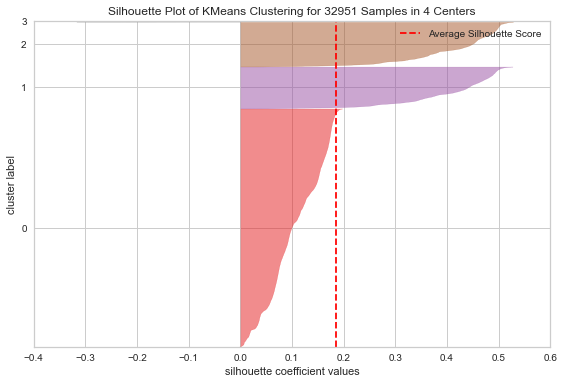

In [136]:
#Silhouette Score Visualiser
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
fig.savefig(r'/Users/rakeshdhara/Documents/Master of Management Analytics/22 831 Marketing Analytics/Group Project/olist_units_vs_price_kmeans_5_silhouette.png', transparent=False);

## Elbow Method (Manual)

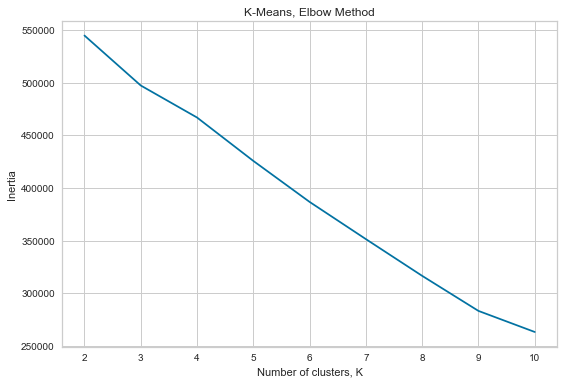

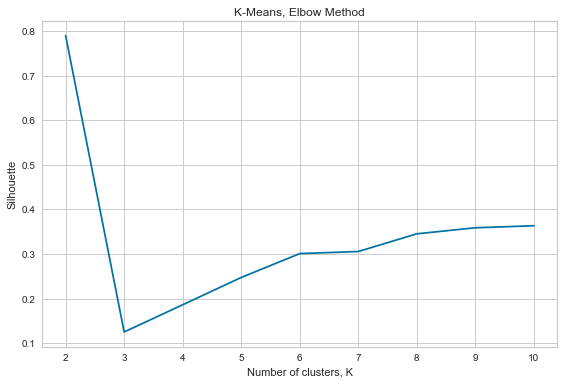

In [137]:
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");
plt.savefig(r'/Users/rakeshdhara/Documents/Master of Management Analytics/22 831 Marketing Analytics/Group Project/olist_units_vs_price_kmeans_elbow_inertia.png');


plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");
plt.savefig(r'/Users/rakeshdhara/Documents/Master of Management Analytics/22 831 Marketing Analytics/Group Project/olist_units_vs_price_kmeans_elbow_silhouette.png');

## Intepretting the Clusters

### Means

In [138]:
k_means.cluster_centers_

array([[-3.57641277e-03, -9.66386632e-05, -3.45309610e-02,
        -3.51642069e-02,  2.76935936e-03,  8.50465791e-03,
        -1.93573020e-02, -3.07641070e-02, -2.49135682e-02,
        -1.86480367e-02,  7.16407528e-02, -3.84601717e-01,
        -3.99389005e-01,  2.83613093e-02,  2.93347383e-01,
         4.79885733e-02,  1.57209182e-01,  1.21398561e-01],
       [ 9.66217325e-03,  1.96798244e-02, -3.18036169e-02,
         1.99511942e-03,  6.76763144e-02, -2.95845113e-03,
         1.04870247e-02, -2.96571178e-02,  6.09485238e-02,
        -1.47441824e-02, -1.95998673e-01,  2.60009239e+00,
        -3.99389005e-01, -7.73551502e-02, -8.04039668e-01,
        -1.30888291e-01, -4.37412994e-01, -3.36354348e-01],
       [ 9.68767193e-03, -1.81432970e-02, -4.58076689e-02,
        -4.40648445e-02, -7.98599982e-02, -4.68213585e-02,
         4.40815836e-02, -4.88963453e-02,  7.64483349e-02,
        -4.06555065e-02, -1.95998673e-01, -3.84601717e-01,
         2.50382456e+00, -7.73551502e-02, -8.04039668e

# Find Examplars

Let's find the observation that is closest to the cluster center

In [139]:
#Identify exemplars

from scipy.spatial import distance

for i, label in enumerate(set(k_means.labels_)):    
    X_tmp = X[k_means.labels_==label].copy()
    
    exemplar_idx = distance.cdist([k_means.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(X_tmp.iloc[exemplar_idx])
   
    print('\nCluster {}:'.format(label))
    exemplar


Cluster 0:


31402
percentage_weekday_products                 -0.048681
percentage_daytime_products                  0.340495
units_sold                                   0.054737
revenue                                      0.093460
avg_price                                   -0.041020
avg_delivery_time_days                      -0.035587
sellers                                     -0.174676
units_sold_per_seller                        0.087410
avg_review_score                            -0.025580
photo_effect                                -0.177244
product_super_category_name_education       -0.195999
product_super_category_name_entertainment   -0.384602
product_super_category_name_fashion         -0.399389
product_super_category_name_food            -0.077355
product_super_category_name_household        1.243720
product_super_category_name_industry        -0.130888
product_super_category_name_technology      -0.437413
product_super_category_name_tools_or_repair -0.336354


Cluster 1:


25463
percentage_weekday_products                 -0.278647
percentage_daytime_products                  0.141285
units_sold                                  -0.039428
revenue                                      0.054318
avg_price                                    0.068981
avg_delivery_time_days                      -0.192703
sellers                                     -0.174676
units_sold_per_seller                       -0.017464
avg_review_score                            -0.025580
photo_effect                                -0.177244
product_super_category_name_education       -0.195999
product_super_category_name_entertainment    2.600092
product_super_category_name_fashion         -0.399389
product_super_category_name_food            -0.077355
product_super_category_name_household       -0.804040
product_super_category_name_industry        -0.130888
product_super_category_name_technology      -0.437413
product_super_category_name_tools_or_repair -0.336354


Cluster 2:


30274
percentage_weekday_products                 -0.048681
percentage_daytime_products                  0.340495
units_sold                                   0.054737
revenue                                      0.060659
avg_price                                   -0.086586
avg_delivery_time_days                      -0.300721
sellers                                     -0.174676
units_sold_per_seller                        0.087410
avg_review_score                             0.178423
photo_effect                                -0.177244
product_super_category_name_education       -0.195999
product_super_category_name_entertainment   -0.384602
product_super_category_name_fashion          2.503825
product_super_category_name_food            -0.077355
product_super_category_name_household       -0.804040
product_super_category_name_industry        -0.130888
product_super_category_name_technology      -0.437413
product_super_category_name_tools_or_repair -0.336354


Cluster 3:


18044
percentage_weekday_products                   0.112787
percentage_daytime_products                  -0.180845
units_sold                                   12.955476
revenue                                      10.262705
avg_price                                    -0.172226
avg_delivery_time_days                        0.168331
sellers                                      -0.174676
units_sold_per_seller                        14.455175
avg_review_score                              0.084379
photo_effect                                 -0.177244
product_super_category_name_education        -0.195999
product_super_category_name_entertainment    -0.384602
product_super_category_name_fashion          -0.399389
product_super_category_name_food             -0.077355
product_super_category_name_household        -0.804040
product_super_category_name_industry         -0.130888
product_super_category_name_technology       -0.437413
product_super_category_name_tools_or_repair   2.973055

# Relative Importance Plots

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]
//anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


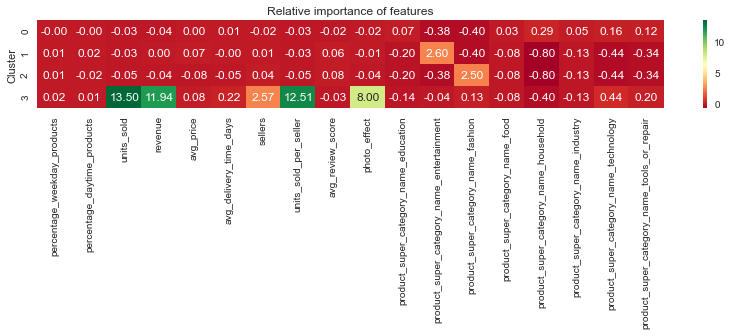

In [140]:
dat = X.copy()

dat['Cluster'] = k_means.labels_

cluster_avg = dat.groupby(['Cluster']).mean()
population_avg = dat.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(12, 2));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn');
plt.savefig(r'/Users/rakeshdhara/Documents/Master of Management Analytics/22 831 Marketing Analytics/Group Project/olist_units_vs_price_kmeans_5_importance.png', transparent=False);

# Hierarchical (Agglomerative)

In [141]:
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(X)

AgglomerativeClustering(n_clusters=5)

In [142]:
agg.labels_[:1000]

array([0, 0, 3, 3, 1, 0, 4, 1, 3, 1, 3, 0, 0, 1, 3, 4, 3, 4, 3, 3, 3, 4,
       0, 4, 0, 3, 3, 3, 3, 4, 3, 0, 4, 0, 4, 3, 3, 3, 0, 0, 4, 3, 0, 0,
       0, 4, 0, 3, 3, 4, 3, 0, 3, 3, 3, 0, 0, 1, 1, 3, 1, 3, 3, 0, 3, 3,
       0, 0, 1, 1, 1, 3, 3, 4, 0, 3, 1, 3, 0, 0, 4, 3, 4, 0, 0, 3, 1, 1,
       0, 3, 3, 1, 3, 3, 3, 3, 1, 1, 0, 1, 1, 1, 3, 4, 3, 3, 1, 0, 4, 4,
       1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 0, 1, 3, 0, 3,
       4, 3, 4, 3, 4, 1, 1, 4, 3, 0, 3, 1, 1, 0, 3, 0, 3, 3, 1, 3, 3, 4,
       4, 1, 3, 3, 3, 1, 4, 0, 1, 1, 3, 4, 0, 1, 3, 3, 1, 4, 3, 3, 3, 0,
       0, 1, 3, 0, 3, 0, 3, 3, 1, 4, 4, 0, 4, 3, 3, 3, 0, 4, 1, 0, 4, 3,
       0, 3, 3, 0, 0, 3, 1, 3, 0, 0, 3, 1, 3, 3, 3, 3, 1, 3, 0, 3, 0, 4,
       3, 3, 3, 1, 4, 0, 0, 3, 3, 4, 3, 3, 4, 3, 1, 3, 3, 0, 0, 3, 3, 0,
       1, 0, 1, 3, 3, 0, 4, 0, 3, 1, 3, 3, 4, 3, 0, 0, 3, 1, 3, 1, 0, 4,
       0, 4, 1, 0, 0, 1, 1, 0, 1, 0, 4, 3, 3, 3, 3, 0, 0, 3, 1, 0, 4, 0,
       3, 4, 3, 4, 3, 1, 4, 3, 0, 1, 1, 3, 0, 0, 0,

In [143]:
#Calculating Silhouette Score
silhouette_score(X, agg.labels_)

0.18789543300789335

In [144]:
#CHECKING CLUSTER SIZES

#generate cluster means
cluster_labels = agg.labels_
cluster_labels

#examine feature means for each of our 4 clusters
means = np.zeros((5, X.shape[1])) #create empty matrix

for i, label in enumerate(set(cluster_labels)):
    means[i,:] = X[cluster_labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(cluster_labels==label)))
    #print(scaler.inverse_transform(means[i,:])) #reverse the prior standardization for interpretable results r
    
means

array([0, 0, 3, ..., 0, 1, 3])


Cluster 0 (n=8509):

Cluster 1 (n=7498):

Cluster 2 (n=11):

Cluster 3 (n=12937):

Cluster 4 (n=3996):


array([[ 2.90034647e-02, -3.55690187e-03, -1.14836512e-01,
        -1.36091183e-01, -1.31490169e-01, -1.16012854e-01,
        -1.59312931e-01, -1.03320462e-01,  1.02995248e-01,
        -5.57744611e-02,  5.58022677e-01, -3.84601717e-01,
         9.50371586e-01,  2.22201737e-01, -8.04039668e-01,
        -1.30888291e-01, -4.37412994e-01,  8.87220927e-01],
       [ 9.31901398e-03,  2.39758699e-02,  2.90767800e-01,
         3.86313795e-01,  4.37791982e-01,  4.73620395e-02,
         5.73989186e-01,  2.42601274e-01, -1.03699608e-02,
         1.89572707e-01, -1.90345886e-01, -2.85881507e-01,
        -2.35216885e-01, -7.73551502e-02, -5.91835207e-01,
         4.44318440e-01,  1.48086337e+00, -2.52052241e-01],
       [ 4.99360862e-02,  1.73504999e-02,  3.43225906e+01,
         2.50571473e+01, -1.47660067e-01,  2.46258040e-01,
         8.73921465e-01,  3.38727902e+01,  1.32198892e-02,
         2.07835263e+01, -1.95998673e-01, -3.84601717e-01,
         1.28468007e-01, -7.73551502e-02, -4.31719777e

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  
//anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


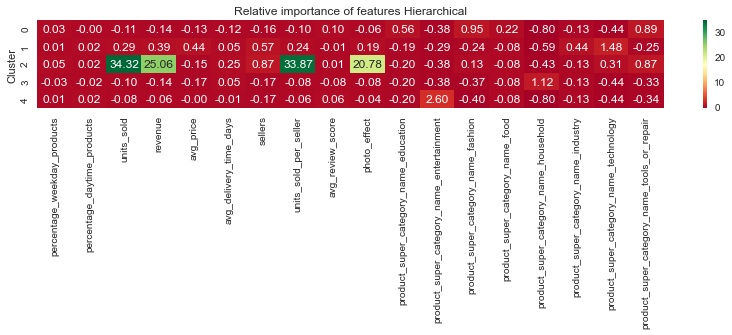

In [145]:
#Relative Importance Plot
dat = X.copy()

dat['Cluster'] = agg.labels_

cluster_avg = dat.groupby(['Cluster']).mean()
population_avg = dat.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(12, 2));
plt.title('Relative importance of features Hierarchical');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn');
plt.savefig(r'/Users/rakeshdhara/Documents/Master of Management Analytics/22 831 Marketing Analytics/Group Project/olist_units_vs_price_kmeans_5_importance.png', transparent=False);

## Dendograms, Linkages, and Distance Metrics

Note that scikit learn does not itself currently support plotting dendograms. Instead, we'll use SciPy's `cluster.hierarchy` module to re-do the clustering, and plot the dendogram.

## Dendrograms

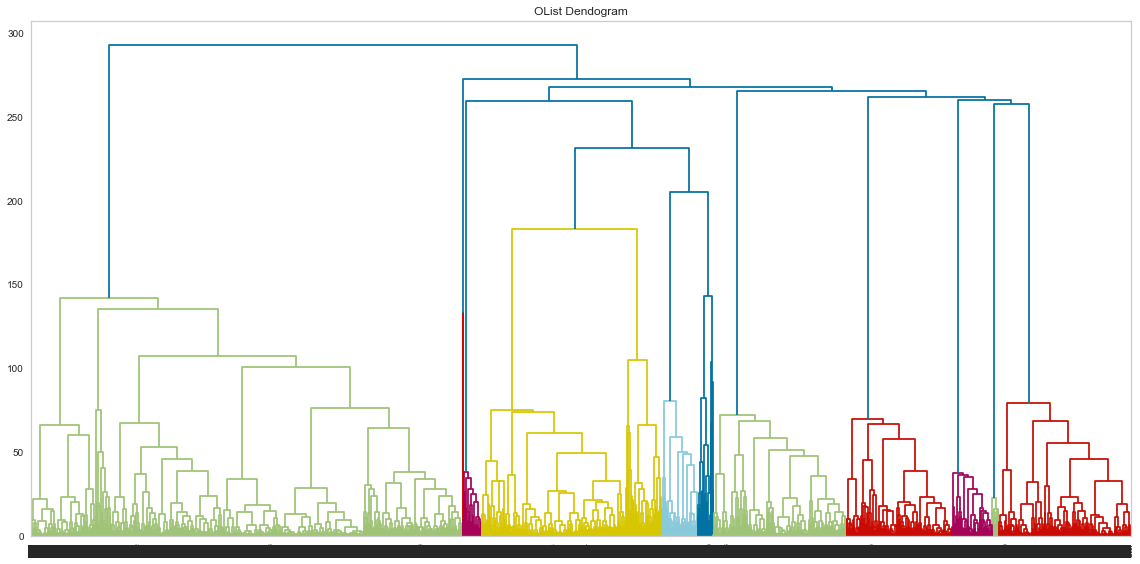

In [153]:
#import scipy
#import scipy.cluster

#create agglomerative clustering
agg = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

# Plot the dendogram 0 this time with better labels
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("OList Dendogram");
dend = scipy.cluster.hierarchy.dendrogram(agg);
plt.savefig(r'/Users/rakeshdhara/Documents/Master of Management Analytics/22 831 Marketing Analytics/Group Project/olist_units_vs_price_interpret_dendro_2.png');

In [146]:
df['Agg_Cluster'] = agg.labels_
df.head()

product_id  percentage_weekday_products  \
0  00066f42aeeb9f3007548bb9d3f33c38                          0.0   
1  00088930e925c41fd95ebfe695fd2655                          1.0   
2  0009406fd7479715e4bef61dd91f2462                          1.0   
3  000b8f95fcb9e0096488278317764d19                          1.0   
4  000d9be29b5207b54e86aa1b1ac54872                          1.0   

   percentage_daytime_products product_category_name_english  units_sold  \
0                          0.0                     perfumery           1   
1                          0.0                          auto           1   
2                          1.0                bed_bath_table           1   
3                          0.5                    housewares           2   
4                          1.0                 watches_gifts           1   

   revenue  avg_price  avg_delivery_time_days  sellers  units_sold_per_seller  \
0   101.65     101.65                    18.0        1                    1.0   
1   129.90     129.90                    11.0        1                    1.0   
2   229.00     229.00                    16.0        1                    1.0   
3   117.80      58.90                     7.0        1                    2.0   
4   199.00     199.00                     8.0        1                    1.0   

   ...  product_super_category_name_education  \
0  ...                                      0   
1  ...                                      0   
2  ...                                      0   
3  ...                                      0   
4  ...                                      0   

   product_super_category_name_entertainment  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   product_super_category_name_fashion  product_super_category_name_food  \
0                                    1                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   product_super_category_name_household  \
0                                      0   
1                                      0   
2                                      1   
3                                      1   
4                                      0   

   product_super_category_name_industry  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   product_super_category_name_technology  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       1   

   product_super_category_name_tools_or_repair  KMeans_4_Cluster  Agg_Cluster  
0                                            0                 2            0  
1                                            1                 0            0  
2                                            0                 0            3  
3                                            0                 0            3  
4                                            0                 0            1  

[5 rows x 22 columns]

# Interpreting Clusters

## Means

In [147]:
cluster_agg = df.groupby(['Agg_Cluster']).mean()
cluster_agg

percentage_weekday_products  percentage_daytime_products  \
Agg_Cluster                                                             
0                               0.778150                     0.606077   
1                               0.771017                     0.617595   
2                               0.785736                     0.614823   
3                               0.757954                     0.600138   
4                               0.770235                     0.615940   

             units_sold       revenue   avg_price  avg_delivery_time_days  \
Agg_Cluster                                                                 
0              2.199201    225.773595  112.838592               11.317482   
1              6.506535    942.473930  253.389806               12.703925   
2            367.909091  34789.001818  108.846374               14.391810   
3              2.384788    223.091204  104.286412               12.742976   
4              2.565566    334.098281  144.507138               12.210825   

              sellers  units_sold_per_seller  avg_review_score  photo_effect  \
Agg_Cluster                                                                    
0            1.003996               2.181337          4.157565      0.687507   
1            1.194719               5.479782          4.018640      2.076154   
2            1.272727             326.151515          4.047548    118.636364   
3            1.000000               2.384788          3.931764      0.559635   
4            1.000000               2.565566          4.108786      0.774274   

             product_super_category_name_education  \
Agg_Cluster                                          
0                                         0.142320   
1                                         0.001067   
2                                         0.000000   
3                                         0.000000   
4                                         0.000000   

             product_super_category_name_entertainment  \
Agg_Cluster                                              
0                                             0.000000   
1                                             0.033075   
2                                             0.000000   
3                                             0.000155   
4                                             1.000000   

             product_super_category_name_fashion  \
Agg_Cluster                                        
0                                       0.464919   
1                                       0.056548   
2                                       0.181818   
3                                       0.011672   
4                                       0.000000   

             product_super_category_name_food  \
Agg_Cluster                                     
0                                    0.023034   
1                                    0.000000   
2                                    0.000000   
3                                    0.000000   
4                                    0.000000   

             product_super_category_name_household  \
Agg_Cluster                                          
0                                         0.000000   
1                                         0.103628   
2                                         0.181818   
3                                         0.939862   
4                                         0.000000   

             product_super_category_name_industry  \
Agg_Cluster                                         
0                                         0.00000   
1                                         0.07402   
2                                         0.00000   
3                                         0.00000   
4                                         0.00000   

             product_super_category_name_technology  \
Agg_Cluster                                           
0                                          0

## Cluster Size

In [148]:
cluster_agg['N Obs'] = df[['units_sold', 'Agg_Cluster']].groupby(['Agg_Cluster']).count()
cluster_agg['Prob Obs'] = cluster_agg['N Obs']/ cluster_agg['N Obs'].sum()

cluster_agg

cluster_agg.to_csv('831 Product Agg Cluster Means.csv', index=True)

percentage_weekday_products  percentage_daytime_products  \
Agg_Cluster                                                             
0                               0.778150                     0.606077   
1                               0.771017                     0.617595   
2                               0.785736                     0.614823   
3                               0.757954                     0.600138   
4                               0.770235                     0.615940   

             units_sold       revenue   avg_price  avg_delivery_time_days  \
Agg_Cluster                                                                 
0              2.199201    225.773595  112.838592               11.317482   
1              6.506535    942.473930  253.389806               12.703925   
2            367.909091  34789.001818  108.846374               14.391810   
3              2.384788    223.091204  104.286412               12.742976   
4              2.565566    334.098281  144.507138               12.210825   

              sellers  units_sold_per_seller  avg_review_score  photo_effect  \
Agg_Cluster                                                                    
0            1.003996               2.181337          4.157565      0.687507   
1            1.194719               5.479782          4.018640      2.076154   
2            1.272727             326.151515          4.047548    118.636364   
3            1.000000               2.384788          3.931764      0.559635   
4            1.000000               2.565566          4.108786      0.774274   

             ...  product_super_category_name_entertainment  \
Agg_Cluster  ...                                              
0            ...                                   0.000000   
1            ...                                   0.033075   
2            ...                                   0.000000   
3            ...                                   0.000155   
4            ...                                   1.000000   

             product_super_category_name_fashion  \
Agg_Cluster                                        
0                                       0.464919   
1                                       0.056548   
2                                       0.181818   
3                                       0.011672   
4                                       0.000000   

             product_super_category_name_food  \
Agg_Cluster                                     
0                                    0.023034   
1                                    0.000000   
2                                    0.000000   
3                                    0.000000   
4                                    0.000000   

             product_super_category_name_household  \
Agg_Cluster                                          
0                                         0.000000   
1                                         0.103628   
2                                         0.181818   
3                                         0.939862   
4                                         0.000000   

             product_super_category_name_industry  \
Agg_Cluster                                         
0                                         0.00000   
1                                         0.07402   
2                                         0.00000   
3                                         0.00000   
4                                         0.00000   

             product_super_category_name_technology  \
Agg_Cluster                                           
0                                          0.000000   
1                                          0.704321   
2                                          0.272727   
3                                          0.000618   
4                                          0.000000   

             product_super_category_name_tools_or_repair  KMeans_4_Cluster  \
Agg_Cluster                       

In [121]:
df.to_csv('831 Product with Cluster ID.csv', index=True)

## Dataset Mean

In [149]:
data_mean = df.mean()
data_mean

percentage_weekday_products                      0.767640
percentage_daytime_products                      0.607565
units_sold                                       3.418713
revenue                                        412.480462
avg_price                                      145.302464
avg_delivery_time_days                          12.301998
sellers                                          1.045431
units_sold_per_seller                            3.166522
avg_review_score                                 4.031348
photo_effect                                     1.003187
product_super_category_name_education            0.036994
product_super_category_name_entertainment        0.128858
product_super_category_name_fashion              0.137568
product_super_category_name_food                 0.005948
product_super_category_name_household            0.392644
product_super_category_name_industry             0.016843
product_super_category_name_technology           0.160602
product_super_

## Exemplars

In [150]:
labels = scipy.cluster.hierarchy.fcluster(aggl, 5, criterion="maxclust")

from scipy.spatial import distance

for i, label in enumerate(set(labels)):
    X_tmp= X
    exemplar_idx = distance.cdist([means[i]], X).argmin()
   
    print('\nCluster {}:'.format(label))
    #print("  Examplar ID: {}".format(exemplar_idx))
    #print("  Label: {}".format(labels[exemplar_idx]))
    #print("  Features:")
    display(df.iloc[[exemplar_idx]])


Cluster 1:


product_id  percentage_weekday_products  \
17746  8a0c7c7b32d023b5c6cefe93d16e4a99                     0.666667   

       percentage_daytime_products product_category_name_english  units_sold  \
17746                     0.666667                           NaN           3   

       revenue  avg_price  avg_delivery_time_days  sellers  \
17746   284.97      94.99               14.333333        1   

       units_sold_per_seller  ...  product_super_category_name_education  \
17746                    3.0  ...                                      0   

       product_super_category_name_entertainment  \
17746                                          0   

       product_super_category_name_fashion  product_super_category_name_food  \
17746                                    0                                 0   

       product_super_category_name_household  \
17746                                      0   

       product_super_category_name_industry  \
17746                                     0   

       product_super_category_name_technology  \
17746                                       0   

       product_super_category_name_tools_or_repair  KMeans_4_Cluster  \
17746                                            0                 0   

       Agg_Cluster  
17746            3  

[1 rows x 22 columns]


Cluster 2:


product_id  percentage_weekday_products  \
4196  1fa52682d6938b129312ef4cffac1711                          0.8   

      percentage_daytime_products product_category_name_english  units_sold  \
4196                          0.6         computers_accessories           5   

      revenue  avg_price  avg_delivery_time_days  sellers  \
4196    823.5      164.7                    13.0        1   

      units_sold_per_seller  ...  product_super_category_name_education  \
4196                    5.0  ...                                      0   

      product_super_category_name_entertainment  \
4196                                          0   

      product_super_category_name_fashion  product_super_category_name_food  \
4196                                    0                                 0   

      product_super_category_name_household  \
4196                                      0   

      product_super_category_name_industry  \
4196                                     0   

      product_super_category_name_technology  \
4196                                       1   

      product_super_category_name_tools_or_repair  KMeans_4_Cluster  \
4196                                            0                 0   

      Agg_Cluster  
4196            1  

[1 rows x 22 columns]


Cluster 3:


product_id  percentage_weekday_products  \
27039  d1c427060a0f73f6b889a5c7c61f2ac4                     0.760933   

       percentage_daytime_products product_category_name_english  units_sold  \
27039                     0.629738         computers_accessories         343   

        revenue   avg_price  avg_delivery_time_days  sellers  \
27039  47214.51  137.651633               13.413994        1   

       units_sold_per_seller  ...  product_super_category_name_education  \
27039                  343.0  ...                                      0   

       product_super_category_name_entertainment  \
27039                                          0   

       product_super_category_name_fashion  product_super_category_name_food  \
27039                                    0                                 0   

       product_super_category_name_household  \
27039                                      0   

       product_super_category_name_industry  \
27039                                     0   

       product_super_category_name_technology  \
27039                                       1   

       product_super_category_name_tools_or_repair  KMeans_4_Cluster  \
27039                                            0                 3   

       Agg_Cluster  
27039            2  

[1 rows x 22 columns]


Cluster 4:


product_id  percentage_weekday_products  \
23263  b57469faf40b556e16b9a49308953700                     0.666667   

       percentage_daytime_products product_category_name_english  units_sold  \
23263                     0.666667                bed_bath_table           3   

       revenue   avg_price  avg_delivery_time_days  sellers  \
23263    330.8  110.266667                    13.0        1   

       units_sold_per_seller  ...  product_super_category_name_education  \
23263                    3.0  ...                                      0   

       product_super_category_name_entertainment  \
23263                                          0   

       product_super_category_name_fashion  product_super_category_name_food  \
23263                                    0                                 0   

       product_super_category_name_household  \
23263                                      1   

       product_super_category_name_industry  \
23263                                     0   

       product_super_category_name_technology  \
23263                                       0   

       product_super_category_name_tools_or_repair  KMeans_4_Cluster  \
23263                                            0                 0   

       Agg_Cluster  
23263            3  

[1 rows x 22 columns]


Cluster 5:


product_id  percentage_weekday_products  \
25463  c5f91783ab6cb187c7182b8e4b8c9047                     0.666667   

       percentage_daytime_products product_category_name_english  units_sold  \
25463                     0.666667                    cine_photo           3   

       revenue   avg_price  avg_delivery_time_days  sellers  \
25463    487.0  162.333333               10.666667        1   

       units_sold_per_seller  ...  product_super_category_name_education  \
25463                    3.0  ...                                      0   

       product_super_category_name_entertainment  \
25463                                          1   

       product_super_category_name_fashion  product_super_category_name_food  \
25463                                    0                                 0   

       product_super_category_name_household  \
25463                                      0   

       product_super_category_name_industry  \
25463                                     0   

       product_super_category_name_technology  \
25463                                       0   

       product_super_category_name_tools_or_repair  KMeans_4_Cluster  \
25463                                            0                 1   

       Agg_Cluster  
25463            4  

[1 rows x 22 columns]

## Relative Importance Plot

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]
//anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


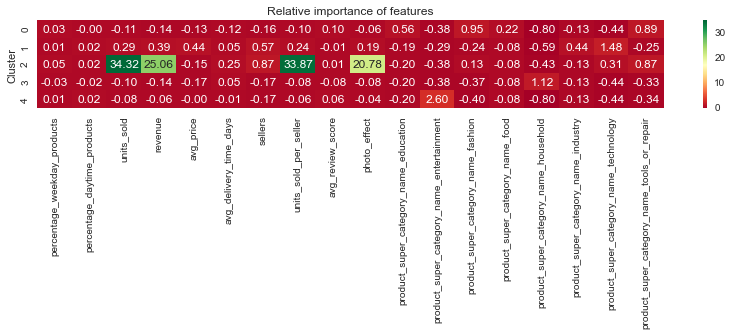

In [151]:
dat = X.copy()

dat['Cluster'] = agg.labels_

cluster_avg = dat.groupby(['Cluster']).mean()
population_avg = dat.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(12, 2));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn');
plt.savefig(r'/Users/rakeshdhara/Documents/Master of Management Analytics/22 831 Marketing Analytics/Group Project/olist_units_vs_price_agg_importance.png', transparent=False);